## Checkpoint 20.5: Challenge- Model Comparison

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import os

In [3]:
os.getcwd()

'C:\\Users\\gothv\\Practice\\Thinkful- Assignments'

In [4]:
os.chdir('C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets')

In [5]:
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets'

#  Run me- Here is your first load!

In [216]:
students_df= pd.read_csv('student-mat.csv')

## EDA: Taking a Closer Look at Our Data

In [197]:
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [87]:
students_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Run me! This is your column clean-up!

Some of these column names are difficult to understand what the creator of the database was trying to tell the reader. Let's rename the columns to help us understand the content better.

In [217]:
students_df.rename(columns = {'Pstatus': 'parent_cohabitation', 'Medu': 'mom_edu', 'Fedu':'dad_edu', 'Mjob':'mom_job', 
                              'Fjob': 'dad_job', 'schoolsup':'extra_ed_support', 'famsup':'family_support', 'paid': 'paid_extra_classes',
                             'famrel': 'fam_relations_quality', 'goout': 'goes_out', 'Dalc': 'daily_alc', 'Walc': 'weekend_alc', 'G1':'first_period_grade', 'G2': 'second_period_grade', 'G3':'final_grade'}, inplace= True)

In [199]:
students_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'parent_cohabitation',
       'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'extra_ed_support',
       'family_support', 'paid_extra_classes', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'fam_relations_quality', 'freetime',
       'goes_out', 'daily_alc', 'weekend_alc', 'health', 'absences',
       'first_period_grade', 'second_period_grade', 'final_grade'],
      dtype='object')

In [136]:
students_df.head()

,school,sex,age,address,famsize,parent_cohabitation,mom_edu,dad_edu,mom_job,dad_job,...,fam_relations_quality,freetime,goes_out,daily_alc,weekend_alc,health,absences,first_period_grade,second_period_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


What does this data look like, overall?

In [68]:
students_df.describe(include = 'all')

,school,sex,age,address,famsize,parent_cohabitation,mom_edu,dad_edu,mom_job,dad_job,...,fam_relations_quality,freetime,goes_out,daily_alc,weekend_alc,health,absences,first_period_grade,second_period_grade,final_grade
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


Checking our data to see if there is any null or missing values! 

In [23]:
students_df.isnull().sum()

school                   0
sex                      0
age                      0
address                  0
famsize                  0
parent_cohabitation      0
mom_edu                  0
dad_edu                  0
mom_job                  0
dad_job                  0
reason                   0
guardian                 0
traveltime               0
studytime                0
failures                 0
extra_ed_support         0
family_support           0
paid_extra_classes       0
activities               0
nursery                  0
higher                   0
internet                 0
romantic                 0
fam_relations_quality    0
freetime                 0
goes_out                 0
daily_alc                0
weekend_alc              0
health                   0
absences                 0
first_period_grade       0
second_period_grade      0
final_grade              0
dtype: int64

Checking to see what data types our dataset has and, if needed, changing any super weird types to make our analysis work!

In [24]:
students_df.dtypes

school                   object
sex                      object
age                       int64
address                  object
famsize                  object
parent_cohabitation      object
mom_edu                   int64
dad_edu                   int64
mom_job                  object
dad_job                  object
reason                   object
guardian                 object
traveltime                int64
studytime                 int64
failures                  int64
extra_ed_support         object
family_support           object
paid_extra_classes       object
activities               object
nursery                  object
higher                   object
internet                 object
romantic                 object
fam_relations_quality     int64
freetime                  int64
goes_out                  int64
daily_alc                 int64
weekend_alc               int64
health                    int64
absences                  int64
first_period_grade        int64
second_p

Feature Distribution: What does our target variable (final_grade) really look like?

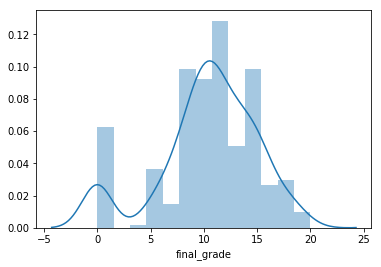

In [27]:
sns.distplot(students_df['final_grade']);

Hmmm.... something isn't right here! Let's take a deeper look into our target variable. We know, from documentation, that our final grade score goes from 0-20, but it seems that the students' grades are all over the place. I am just going to double check and see if there was an error or if this truly is the what the data are telling us!

In [35]:
students_df['final_grade'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: final_grade, dtype: float64

Since the describe above makes sense (especially having taught before and understanding that student grades are usually all over the spectrum) let's start looking at how our features correlate with our target variable, final_grade.

In [47]:
students_df.corr().loc['final_grade', :].sort_values(ascending = False)

final_grade              1.000000
second_period_grade      0.904868
first_period_grade       0.801468
mom_edu                  0.217147
dad_edu                  0.152457
studytime                0.097820
fam_relations_quality    0.051363
absences                 0.034247
freetime                 0.011307
weekend_alc             -0.051939
daily_alc               -0.054660
health                  -0.061335
traveltime              -0.117142
goes_out                -0.132791
age                     -0.161579
failures                -0.360415
Name: final_grade, dtype: float64

### Feature Engineering/Seting Up for Our Modeling
Looking at the information above we see that the two features that are correlated the most with our final grade are our first and second period grades. This makes sense because our final grade is an average of the two. Let's play around with some of the other features to see if we can create new features that have a higher correlation to our desired end goal.

In [191]:
students_df.head()

,school,sex,age,address,famsize,parent_cohabitation,mom_edu,dad_edu,mom_job,dad_job,...,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,0,0,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,0,0,0,0,0,0,0,0


In [137]:
non_numeric_columns = students_df.select_dtypes(['object']).columns
print(non_numeric_columns)

Index(['school', 'sex', 'address', 'famsize', 'parent_cohabitation', 'mom_job',
       'dad_job', 'reason', 'guardian', 'extra_ed_support', 'family_support',
       'paid_extra_classes', 'activities', 'nursery', 'higher', 'internet',
       'romantic'],
      dtype='object')


# Run me- I set up your first dummies!

In [218]:
dummies_df = pd.get_dummies(data=students_df, columns=['school', 'sex', 'address', 'famsize', 'parent_cohabitation', 'mom_job',
       'dad_job', 'reason', 'guardian', 'extra_ed_support', 'family_support',
       'paid_extra_classes', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'mom_edu', 'dad_edu', 'traveltime', 'studytime', 'failures', 'fam_relations_quality'
                                                              , 'goes_out', 'daily_alc', 'weekend_alc', 'health', 'age', 'freetime', 'absences'])

# Run me- I combine your dataframes!

In [221]:
students_df= students_df.merge(dummies_df, left_index= True, right_index= True)

In [222]:
students_df.head()

,school,sex,age,address,famsize,parent_cohabitation,mom_edu,dad_edu,mom_job,dad_job,...,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,0,0,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,0,0,0,0,0,0,0,0


# Run me- I set up your dummies list to drop!

In [223]:
dummified = ['school', 'sex', 'address', 'famsize', 'parent_cohabitation', 'mom_job',
       'dad_job', 'reason', 'guardian', 'extra_ed_support', 'family_support',
       'paid_extra_classes', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'mom_edu', 'dad_edu', 'traveltime', 'studytime', 'failures', 'fam_relations_quality'
                                                              , 'goes_out', 'daily_alc', 'weekend_alc', 'health', 'age', 'freetime', 'absences']

In [210]:
students_df.head()

,school,sex,age,address,famsize,parent_cohabitation,mom_edu,dad_edu,mom_job,dad_job,...,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,0,0,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,0,0,0,0,0,0,0,0


In [250]:
new_students_df = students_df.copy()

In [225]:
new_students_df.head()

,school,sex,age,address,famsize,parent_cohabitation,mom_edu,dad_edu,mom_job,dad_job,...,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,0,0,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,0,0,0,0,0,0,0,0


In [251]:
for dummy in dummified:
    del new_students_df[dummy]

In [252]:
del new_students_df['first_period_grade_x']
del new_students_df['second_period_grade_x']
del new_students_df['final_grade_x']

new_students_df.rename(columns = {'first_period_grade_y': 'first_period_grade', 'second_period_grade_y': 'second_period_grade', 
                       'final_grade_y': 'final_grade'}, inplace = True)

In [253]:
new_students_df.head()

,first_period_grade,second_period_grade,final_grade,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,...,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,5,6,6,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,5,6,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,8,10,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,15,14,15,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,6,10,10,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


Let's take a peek to see which features are currently most strongly related to our target variable: final_grade!

In [255]:
new_students_df.corr().loc['final_grade', :].sort_values(ascending = False).head(13)

final_grade            1.000000
second_period_grade    0.904868
first_period_grade     0.801468
failures_0             0.355090
mom_edu_4              0.207552
higher_yes             0.182465
absences_2             0.144765
romantic_no            0.129970
dad_edu_4              0.117569
health_1               0.117034
mom_job_health         0.116158
freetime_2             0.110257
traveltime_1           0.109430
Name: final_grade, dtype: float64

In the correlation above I looked at the top 13 features for correlation to final price. I choose 13 because I already know that all three of the grade features are very closely correlated (expecially the 1 to 1 of final grade) and wanted to see the top 10 features that weren't directly grades. Translating the info above into English we see that the following things lead to a higher final grade:

* Parents having an education higher than highschool (specifically students who have a mother who went to college)
* No classes failed previously
* A personal desire to go to college
* No romantic relationships to distract them from studies
* Very good health
* A mother who works in healthcare
* Pretty low amounts of freetime after school
* And who travels less than 15 minutes to school daily. 

After looking at this info I have to wonder if I can engineer/combine some of the features to help improve their correlation, such as education for parents and health/absences.

In [261]:
new_students_df['parents_college']= new_students_df['mom_edu_4'] + new_students_df['dad_edu_4']

In [257]:
new_students_df['goodhealth_and_lowabs']=  new_students_df['health_1'] + new_students_df['absences_2']

In [262]:
new_students_df.corr().loc['final_grade', :].sort_values(ascending = False).head(13)

final_grade              1.000000
second_period_grade      0.904868
first_period_grade       0.801468
failures_0               0.355090
goodhealth_and_lowabs    0.183609
higher_yes               0.182465
absences_2               0.144765
romantic_no              0.129970
dad_edu_4                0.117569
parents_college          0.117569
mom_edu_4                0.117569
health_1                 0.117034
mom_job_health           0.116158
Name: final_grade, dtype: float64

# Playing with Our Models!

After enginering features above I have selected the features (second_period_grade, first_period_grade, failures_0, goodhealth_and_lowabs, and higher_yes) I want to run in our model. 

In [264]:
# let's set up our model with our 1st and 2nd period grades (will try without as well)
X = new_students_df[['second_period_grade', 'first_period_grade', 'failures_0', 'goodhealth_and_lowabs', 'higher_yes']]
Y= new_students_df['final_grade']

Since our directions ask us to try this model out using OLS and KNN to compare, I am going to play with my OLS first to find the best possible version of it to use against a KNN!

In [267]:
# Bust out the OLS 
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\gothv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     368.7
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          3.96e-145
Time:                        11:25:45   Log-Likelihood:                -816.09
No. Observations:                 395   AIC:                             1644.
Df Residuals:                     389   BIC:                             1668.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.1917      0.497     -4.407      0.000      -3.169      -1.214
second_period_grade       0.9675      0.050     19.378      0.000       0.869       1.066
first_period_grade        0.1411      0.056      2.512      0.012       0.031       0.252
failures_0                0.6343      0.259      2.445      0.015       0.124       1.144
goodhealth_and_lowabs     0.1778      0.199      0.895      0.371      -0.213       0.568
higher_yes                0.1577      0.459      0.343      0.731      -0.745       1.061
==============================================================================
Omnibus:                      239.915   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1717.964
Skew:                          -2.602   Prob(JB):                         0.00
Kurtosis:                      11.792   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
# Let's try it without the period grades
X = new_students_df[['failures_0', 'goodhealth_and_lowabs', 'higher_yes']]
Y= new_students_df['final_grade']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     23.73
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           3.97e-14
Time:                        11:27:25   Log-Likelihood:                -1128.1
No. Observations:                 395   AIC:                             2264.
Df Residuals:                     391   BIC:                             2280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.2675      0.968      5.442      0.000       3.365       7.170
failures_0                3.4774      0.545      6.378      0.000       2.406       4.549
goodhealth_and_lowabs     1.2616      0.431      2.925      0.004       0.414       2.110
higher_yes                2.1522      1.003      2.147      0.032       0.181       4.124
==============================================================================
Omnibus:                       25.711   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.846
Skew:                          -0.635   Prob(JB):                     5.45e-07
Kurtosis:                       3.377   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R-squared scores (0.824 & 0.148, respectively) let me know that I do, in fact, need to keep the period grades in if I want an accurate model! So, we are keeping them! We will use the first X-features to run our train, test, split!

In [281]:
# Now it's time to make predictions and train_test_split! Woo hoo!

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('The number of observations in the training set is {}'.format(X_train.shape[0]))
print('The  number of observations in the test set is {}'.format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

print(results.summary())

The number of observations in the training set is 316
The  number of observations in the test set is 79
                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     281.3
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          6.62e-113
Time:                        11:41:42   Log-Likelihood:                -667.85
No. Observations:                 316   AIC:                             1348.
Df Residuals:                     310   BIC:                             1370.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\gothv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Our OLS model has an adjusted R-squared of 0.817 which means that our model explains 81.7% of the variance in our model. Not too shabby!

In [276]:
# Let's try a KNN approach to this regression!
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

X = new_students_df[['second_period_grade', 'first_period_grade', 'failures_0', 'goodhealth_and_lowabs', 'higher_yes']]
Y= new_students_df['final_grade']
knn.fit(X,Y);

# THIS IS WHERE I AM STUCK! PLEASE HELP!!

In [278]:
# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)


ValueError: query data dimension must match training data dimension

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))